In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
import matplotlib.pyplot as plt
import joblib
import pickle
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import plotly.express as px  
from skimage.feature import hog, local_binary_pattern
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
os.chdir('/content/drive/MyDrive/IR')

In [ ]:
images_path = os.listdir('/content/drive/MyDrive/IR/Dataset')

In [ ]:
print(len(images_path))

50


In [ ]:

img_dir='/content/drive/MyDrive/IR/Dataset'
img_classes = os.listdir(img_dir)
print(img_classes)

['Apple', 'BarackObama', 'Bikes', 'Bottle', 'Buddha', 'Butterfly', 'Camera', 'Car', 'Cat', 'Chair', 'Chocolate', 'Clock', 'Cocacola', 'DairyMilk', 'Dalmatian', 'Desert', 'EiffelTower', 'Elephant', 'Helmet', 'Horse', 'IndiaGate', 'Jeans', 'Kangaroo', 'Lotus', 'Maggi', 'Mango', 'Mobile', 'NarendraModi', 'Peacock', 'Rose', 'SachinTendulkar', 'SalmanKhan', 'Shark', 'Sheep', 'Ship', 'Shirt', 'Shoes', 'SoccerBall', 'Sunflower', 'Tabla', 'TajMahal', 'Television', 'Tiger', 'TrafficLight', 'Vase', 'Vulture', 'Waterfall', 'Watermelon', 'Wine', 'Zebra']


In [ ]:
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1dx4zvQflNovIm76qGI7zQ0MP4YT7SYCS/IR'

In [ ]:
# import random
# import shutil

# files_list = []

# for root, dirs, files in os.walk("./Dataset/Zebra"):
#     for file in files:
#         #all 
#         if file.endswith(".jpg" or ".jpeg" or ".png"):
#             files_list.append(os.path.join(root, file))

# #print images
# #lets me count and print the amount of jpeg,jpg,pmg 
# file_count = len(files_list)
# print(file_count)

# print(files_list   )
# filesToCopy = random.sample(files_list,2)  #prints two random files from list 

# destPath = "./Dataset_ExcludedImages/Zebra"

# # if destination dir does not exists, create it
# if os.path.isdir(destPath) == False:
#         os.makedirs(destPath)

# # iteraate over all random files and move them
# for file in filesToCopy:
#     shutil.move(file, destPath)

195
['./Dataset/Zebra/Zebra_135.jpg', './Dataset/Zebra/Zebra_106.jpg', './Dataset/Zebra/Zebra_12.jpg', './Dataset/Zebra/Zebra_117.jpg', './Dataset/Zebra/Zebra_118.jpg', './Dataset/Zebra/Zebra_10.jpg', './Dataset/Zebra/Zebra_100.jpg', './Dataset/Zebra/Zebra_107.jpg', './Dataset/Zebra/Zebra_104.jpg', './Dataset/Zebra/Zebra_127.jpg', './Dataset/Zebra/Zebra_112.jpg', './Dataset/Zebra/Zebra_116.jpg', './Dataset/Zebra/Zebra_13.jpg', './Dataset/Zebra/Zebra_128.jpg', './Dataset/Zebra/Zebra_130.jpg', './Dataset/Zebra/Zebra_114.jpg', './Dataset/Zebra/Zebra_1.jpg', './Dataset/Zebra/Zebra_102.jpg', './Dataset/Zebra/Zebra_138.jpg', './Dataset/Zebra/Zebra_111.jpg', './Dataset/Zebra/Zebra_134.jpg', './Dataset/Zebra/Zebra_122.jpg', './Dataset/Zebra/Zebra_109.jpg', './Dataset/Zebra/Zebra_132.jpg', './Dataset/Zebra/Zebra_125.jpg', './Dataset/Zebra/Zebra_124.jpg', './Dataset/Zebra/Zebra_131.jpg', './Dataset/Zebra/Zebra_129.jpg', './Dataset/Zebra/Zebra_137.jpg', './Dataset/Zebra/Zebra_119.jpg', './Dataset

In [ ]:

def read_images(datapath, classes):
  labels = classes
  images = []  
  num1 = 224
  num2 = 224
  for label in labels:
      path = os.path.join(datapath , label)
      for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img))
        try:
          new_img = cv2.resize(img, (num2, num1))
        except Exception as e:
          print(str(e))
        images.append(new_img)
        # print(images)
      print(label)
  return np.array(images)
   
# full_x = read_images(img_dir, img_classes)

In [ ]:
# save full_x to npy file
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_X_train.npy', full_x)

In [ ]:
full_x =np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_X_train.npy')

In [ ]:
# initialize dictionary map for labels 
map = {} 
index = 0
# iterating through the elements of list 
for i in img_classes: 
    map[i] = index
    index=index+1
      
print(map)

{'Apple': 0, 'BarackObama': 1, 'Bikes': 2, 'Bottle': 3, 'Buddha': 4, 'Butterfly': 5, 'Camera': 6, 'Car': 7, 'Cat': 8, 'Chair': 9, 'Chocolate': 10, 'Clock': 11, 'Cocacola': 12, 'DairyMilk': 13, 'Dalmatian': 14, 'Desert': 15, 'EiffelTower': 16, 'Elephant': 17, 'Helmet': 18, 'Horse': 19, 'IndiaGate': 20, 'Jeans': 21, 'Kangaroo': 22, 'Lotus': 23, 'Maggi': 24, 'Mango': 25, 'Mobile': 26, 'NarendraModi': 27, 'Peacock': 28, 'Rose': 29, 'SachinTendulkar': 30, 'SalmanKhan': 31, 'Shark': 32, 'Sheep': 33, 'Ship': 34, 'Shirt': 35, 'Shoes': 36, 'SoccerBall': 37, 'Sunflower': 38, 'Tabla': 39, 'TajMahal': 40, 'Television': 41, 'Tiger': 42, 'TrafficLight': 43, 'Vase': 44, 'Vulture': 45, 'Waterfall': 46, 'Watermelon': 47, 'Wine': 48, 'Zebra': 49}


In [ ]:
def get_labels(datapath, classes, map):
  labels = classes
  mapping = map  
  ImgLabels = []

  for label in labels:
      path = os.path.join(datapath , label)
      for img in os.listdir(path):
        ImgLabels.append(mapping[label])
        # print(images)
      print(label)
  return np.array(ImgLabels)
   
# Labels = get_labels(img_dir, img_classes, map)

In [ ]:
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/labels.npy',Labels)

In [ ]:
Labels = np.load('/content/drive/MyDrive/IR/Features/CBIR50/labels.npy')

In [ ]:
Labels.shape

(9900,)

In [ ]:

def get_hog(images, name='hog', save=False):
    result = np.array([hog(img, block_norm='L2') for img in images])
    
    if save:
        save_feature(result, name)
        
    return result

In [ ]:
# hog_train = get_hog(full_x, name='hog_train_CBIR50')
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_HOG.npy', hog_train)

In [ ]:
hog_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_HOG.npy')
print(hog_train.shape)

(9900, 54756)


In [ ]:
def get_lbp(images, name='lbp', save=False):
  result = np.array([local_binary_pattern(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), 10, 3).flatten() for img in images])
 
  if save:
      save_feature(result, name)
      
  return result

In [ ]:
lbp_train = get_lbp(full_x, name='lbp_train')
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_LBP.npy', lbp_train)

In [ ]:
def get_kaze(images, name='kaze', save=False):
    # KAZE descriptor for 1 image
    def get_image_kaze(image, vector_size=32):
        alg = cv2.KAZE_create()
        kps = alg.detect(image)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
        return dsc
    
    # KAZE descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_kaze(img)
        features.append(dsc)
    
    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result
      

In [ ]:
# kaze_train = get_kaze(full_x, name='kaze_train_CBIR50')
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_KAZE.npy', kaze_train)

In [ ]:
kaze_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_KAZE.npy')

In [ ]:
kaze_train.shape

(9900, 2048)

In [ ]:
def get_sift(images, name='sift', save=False):
    # SIFT descriptor for 1 image
    def get_image_sift(image, vector_size=15):
        alg = cv2.xfeatures2d.SIFT_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 128
        needed_size = (vector_size * 128)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
    # SIFT descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_sift(img)
        features.append(dsc)

    result = np.array(features)
    
    if save:
        save_feature(result, name)
        
    return result

In [ ]:
# sift_train = get_sift(full_x, name='sift_train')

# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SIFT.npy', sift_train)

In [ ]:
sift_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SIFT.npy')

In [ ]:
!pip uninstall opencv-python

Uninstalling opencv-python-3.4.2.17:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python-3.4.2.17.dist-info/*
Proceed (y/n)? n


In [ ]:
!pip install opencv-python==3.4.2.17

!pip install opencv-contrib-python==3.4.2.17

     |████████████████████████████████| 25.0MB 133kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6MB 215kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
def get_surf(images):
    # SURF descriptor for 1 image
    def get_image_surf(image, vector_size=4):
        alg = cv2.xfeatures2d.SURF_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
    # SURF descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_surf(img)
        features.append(dsc)
    
    result = np.array(features)
    return result

In [ ]:
# surf_train = get_surf(full_x)
# print(surf_train.shape)
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SURF.npy', surf_train)

(9900, 256)


In [ ]:
def norm_features_minmax(train):
    min_max_scaler = preprocessing.MinMaxScaler()
    norm_train = min_max_scaler.fit_transform(train)

    return norm_train

KAZE

In [ ]:
# kaze_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_KAZE.npy')
# norm_kaze_features = norm_features_minmax(kaze_features)
# print(norm_kaze_features.shape)
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_KAZE.npy',norm_kaze_features)

(9900, 2048)


In [ ]:
norm_kaze_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_KAZE.npy')

In [ ]:

print(norm_kaze_features.shape)
pca = PCA(n_components=2048)
pca_kaze_features = pca.fit_transform(norm_kaze_features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

(9900, 2048)


In [ ]:
norm_kaze_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_KAZE.npy')
print(norm_kaze_features.shape)
pca = PCA(n_components=500)
pca_kaze_features = pca.fit_transform(norm_kaze_features)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_KAZE_PCA.npy', pca_kaze_features)
print(pca_kaze_features.shape)

(9900, 2048)
(9900, 500)


SIFT

In [ ]:
# sift_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SIFT.npy')
# norm_sift_features = norm_features_minmax(sift_features)
# print(norm_sift_features.shape)
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_SIFT.npy',norm_sift_features)

(9900, 1920)


In [ ]:
sift_norm_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_SIFT.npy')

In [ ]:

print(sift_norm_features.shape)
pca = PCA(n_components=1920)
pca_sift_features = pca.fit_transform(sift_norm_features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

(9900, 1920)


In [ ]:
sift_norm_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_SIFT.npy')
print(sift_norm_features.shape)
pca = PCA(n_components=400)
pca_sift_features = pca.fit_transform(sift_norm_features)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SIFT_PCA.npy', pca_sift_features)
# pca_surf_features = np.load('Paris_SURF_PCA.npy')
print(pca_sift_features.shape)

(9900, 1920)
(9900, 400)


SURF

In [ ]:
# surf_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SURF.npy')
# norm_surf_features = norm_features_minmax(surf_features)
# print(norm_surf_features.shape)
# np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_SURF.npy',norm_surf_features)

(9900, 256)


In [ ]:
surf_norm_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_SURF.npy')

In [ ]:

print(surf_norm_features.shape)
pca = PCA(n_components=256)
pca_surf_features = pca.fit_transform(surf_norm_features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

(9900, 256)


In [ ]:
surf_norm_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_SURF.npy')
print(surf_norm_features.shape)
pca = PCA(n_components=100)
pca_surf_features = pca.fit_transform(surf_norm_features)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SURF_PCA.npy', pca_surf_features)

print(pca_surf_features.shape)

(9900, 256)
(9900, 100)


**HOG**

In [ ]:
hog_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_HOG.npy')
norm_hog_features = norm_features_minmax(hog_features)
print(norm_hog_features.shape)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_HOG.npy',norm_hog_features)

In [ ]:
norm_hog_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_HOG.npy')
print(norm_hog_features.shape)
pca = PCA(n_components=2000)
pca_hog_features = pca.fit_transform(norm_hog_features)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
    )
fig.show()

(9900, 54756)


In [ ]:
norm_hog_features = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_norm_HOG.npy')
print(norm_hog_features.shape)
pca = PCA(n_components=400)
pca_hog_features = pca.fit_transform(norm_hog_features)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_HOG_PCA', pca_hog_features)

print(pca_hog_features.shape)

In [ ]:
#LDA kaze

lda = LDA()
lda_kaze_train = lda.fit_transform(norm_kaze_features, Labels)
# lda_kaze_val = lda.transform(norm_lbp_val)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_KAZE_LDA', lda_kaze_train)

In [ ]:
lda_sift_train = lda.fit_transform(sift_norm_features, Labels)
# lda_kaze_val = lda.transform(norm_lbp_val)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SIFT_LDA', lda_sift_train)

In [ ]:
lda_surf_train = lda.fit_transform(surf_norm_features, Labels)
# lda_kaze_val = lda.transform(norm_lbp_val)
np.save('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SURF_LDA', lda_surf_train)

In [ ]:
def combine_features(features, horizontal=True):
    """
    Array of features [f1, f2, f3] where each fi is a feature set 
    eg. f1=rgb_flat, f2=SIFT, etc.
    """
    if horizontal:
        return np.hstack(features)
    else:
        return np.vstack(features)

In [ ]:
pca_hog_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_HOG_PCA.npy')
pca_surf_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SURF_PCA.npy')
pca_sift_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SIFT_PCA.npy')
pca_kaze_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_KAZE_PCA.npy')

lda_hog_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_HOG_LDA.npy')
lda_surf_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SURF_LDA.npy')
lda_sift_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_SIFT_LDA.npy')
lda_kaze_train = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_KAZE_LDA.npy')

In [ ]:
features_train_pca = None
# features_val_pca = None

for t in ([pca_hog_train, pca_surf_train, pca_sift_train, pca_kaze_train]):
                  # [pca_hog_val, pca_color_hist_val, pca_surf_val, pca_rgb_val, pca_lbp_val, pca_kaze_val]):    

    if features_train_pca is None:
        features_train_pca = t
        # features_val_pca = v
    else:
        features_train_pca = combine_features([features_train_pca, t])
        # features_val_pca = combine_features([features_val_pca, v])

In [ ]:
np.save('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_pca.npy', features_train_pca)
print(features_train_pca.shape)

(9900, 2500)


In [ ]:
features_train_pca= np.load('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_pca.npy')

In [ ]:
features_train_pca

array([[ 9.65416025,  1.76998318, -4.12904573, ..., -0.0775607 ,
         0.19053262, -0.1632285 ],
       [-3.19343938, -1.97285639, -2.41737916, ..., -0.06286903,
         0.29243579,  0.16091734],
       [ 0.91483604,  1.71999858,  4.68967474, ..., -0.04026391,
        -0.0470053 , -0.07512621],
       ...,
       [-3.22000539, -3.72963171,  2.07557667, ..., -0.04238238,
         0.14436827,  0.11615381],
       [-2.68822211,  4.39490061,  3.30896749, ...,  0.03204283,
         0.06134201,  0.11839753],
       [-3.86436055, -4.34962705, -0.04782482, ...,  0.07969389,
         0.05101855, -0.09711153]])

In [ ]:
features_train_lda = None
# features_val_pca = None

for w in ([lda_hog_train, lda_surf_train, lda_sift_train, lda_kaze_train]):
                  # [pca_hog_val, pca_color_hist_val, pca_surf_val, pca_rgb_val, pca_lbp_val, pca_kaze_val]):    

    if features_train_lda is None:
        features_train_lda = w
        # features_val_pca = v
    else:
        features_train_lda = combine_features([features_train_lda, w])
        # features_val_pca = combine_features([features_val_pca, v])

In [ ]:
np.save('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_lda.npy', features_train_lda)
print(features_train_lda.shape)

(9900, 196)


**Retrieval Code**

In [ ]:
# Model Classification Report
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

full_x = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_X_train.npy')
print(full_x.shape)

# Check and save where labels(folders) are starting
labels = np.load('/content/drive/MyDrive/IR/Features/CBIR50/labels.npy')
temp_count = 0
count = {0: 0}
j = 1
for i in range(len(labels) - 1):
	if labels[i + 1] == labels[i]:
		temp_count += 1
	else:
		count[j] = temp_count + 1
		temp_count = temp_count + 1
		j += 1
count[12] = full_x.shape[0] - 1
print(count)

# Load data for predicting and matching
cbir50_predict = np.load('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_lda.npy') # Used for predicting
cbir50_match = np.load('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_pca.npy') # Used for matching
print(cbir50_predict.shape)
print(cbir50_match.shape)


print(labels.shape)

# X_train, X_test, y_train, y_test = train_test_split(cbir50_predict, labels, test_size=0.2)
# print(y_train)
# model1 = XGBClassifier()
# model1.fit(X_train, y_train)
# y_pred1 = model1.predict(X_test)

# class_report = classification_report(y_test, y_pred1, output_dict=True)
# print('Precision =', class_report['macro avg']['precision'])
# print('Recall = ', class_report['macro avg']['recall'])
# print('F1-score =', class_report['macro avg']['f1-score'])
# print('Accuracy =', class_report['accuracy'])
# acc1 = accuracy_score(y_pred1, y_test)
# print(acc1)


# Images match Code
index = [count[3] + 17] # Give query image index here
test_labels = []
query_image = []
query_image_match = []
show = full_x[index[0]]

for i in range(len(index)):
	query_image.append(cbir50_predict[index[i]])
	query_image_match.append(cbir50_match[index[i]])
query_image = np.array(query_image)
query_image_match = np.array(query_image_match)
print(query_image.shape)
print(query_image_match.shape)

for i in range(len(index)):
	cbir50_match = np.delete(cbir50_match, index[i], axis=0)
	cbir50_predict = np.delete(cbir50_predict, index[i], axis=0)
	full_x = np.delete(full_x, index[i], axis=0)
print(cbir50_predict.shape)

for i in range(len(index)):
	test_labels.append(labels[index[i]])

for i in range(len(index)):
	labels = np.delete(labels, index[i], axis=0)
print(labels.shape)

# model = XGBClassifier()
# model.fit(cbir50_predict, labels)
filename = '/content/drive/MyDrive/IR/Features/CBIR50/XGB_CBIR_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# y_pred = model.predict(query_image)
y_pred = loaded_model.predict(query_image)

print(y_pred)
acc = accuracy_score(y_pred, test_labels)
print(acc)


(9900, 224, 224, 3)
{0: 0, 1: 198, 2: 396, 3: 594, 4: 792, 5: 990, 6: 1188, 7: 1386, 8: 1584, 9: 1782, 10: 1980, 11: 2178, 12: 9899, 13: 2574, 14: 2772, 15: 2970, 16: 3168, 17: 3366, 18: 3564, 19: 3762, 20: 3960, 21: 4158, 22: 4356, 23: 4554, 24: 4752, 25: 4950, 26: 5148, 27: 5346, 28: 5544, 29: 5742, 30: 5940, 31: 6138, 32: 6336, 33: 6534, 34: 6732, 35: 6930, 36: 7128, 37: 7326, 38: 7524, 39: 7722, 40: 7920, 41: 8118, 42: 8316, 43: 8514, 44: 8712, 45: 8910, 46: 9108, 47: 9306, 48: 9504, 49: 9702}
(9900, 196)
(9900, 2500)
(9900,)
(1, 196)
(1, 2500)
(9899, 196)
(9899,)
[3]
1.0


198
{611: 0.38848492562547843, 689: 0.3899446081899831, 678: 0.3950914906098235, 780: 0.4097728252299653, 602: 0.4158307364524325, 758: 0.41754072053557734, 781: 0.42247304876975655, 762: 0.42267271282329133, 778: 0.4239844019972787, 708: 0.4263901618643322, 680: 0.4291532034969897, 774: 0.44101138744667456, 756: 0.4410583159648541, 632: 0.44474817389192334, 737: 0.4456461271262726, 760: 0.4477148314766909, 730: 0.4497912888037593, 725: 0.4509218081941184, 692: 0.45574051573283725, 753: 0.45766102448823354, 734: 0.457707196479998, 608: 0.4595268218201203, 745: 0.4609565471474011, 743: 0.46118564239716153, 654: 0.46158703083721575, 697: 0.46205675602214824, 670: 0.4646466963231898, 605: 0.46555826598970096, 783: 0.4658939247869154, 707: 0.4676212863088174, 648: 0.46952865624866347, 669: 0.46992932963463163, 727: 0.471093433523054, 684: 0.47217397076576106, 733: 0.47217397076576106, 735: 0.4769808884901725, 720: 0.47738739567311117, 625: 0.48030252272189866, 749: 0.48405448799965556, 691

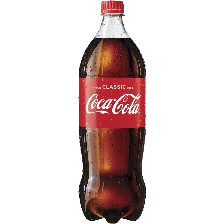

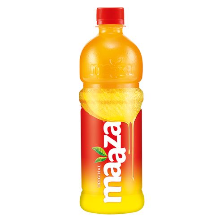

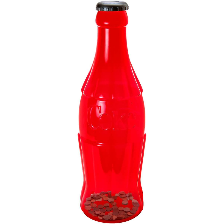

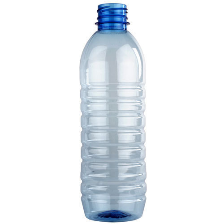

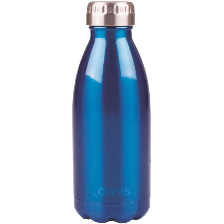

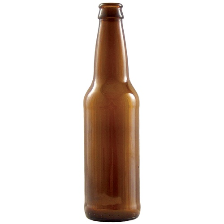

In [ ]:
from scipy import spatial
from google.colab.patches import cv2_imshow
# show = full_x[index[0]]
dist = {}
for i in range(count[y_pred[0]], count[y_pred[0] + 1]):
	dist1 = spatial.distance.cosine(cbir50_match[i], query_image_match[0])
	dist[i] = dist1

dist = {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}
print(len(dist))
print(dist)

# Show Images
# cv2.imshow('Query Image', show)
cv2_imshow( show)
cv2.imwrite('/content/drive/MyDrive/IR/Features/CBIR50/Query Image2.jpg', show)
cv2.waitKey(0)
print('\n')
for i in range(5):
  val = list(dist.keys())[i]
  # cv2.imshow('image', full_x[val])
  # plt.imshow( full_x[val])
  cv2_imshow(full_x[val])
  cv2.imwrite('/content/drive/MyDrive/IR/Features/CBIR50/Matched Image sec' + str(i+1) +'.jpg', full_x[val])
  #write

  cv2.waitKey(0)

In [ ]:
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

full_x = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_X_train.npy')
print(full_x.shape)

# Check and save where labels(folders) are starting
labels = np.load('/content/drive/MyDrive/IR/Features/CBIR50/labels.npy')
temp_count = 0
count = {0: 0}
j = 1
for i in range(len(labels) - 1):
	if labels[i + 1] == labels[i]:
		temp_count += 1
	else:
		count[j] = temp_count + 1
		temp_count = temp_count + 1
		j += 1
count[12] = full_x.shape[0] - 1
print(count)

# Load data for predicting and matching
cbir50_predict = np.load('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_lda.npy') # Used for predicting
cbir50_match = np.load('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_pca.npy') # Used for matching
print(cbir50_predict.shape)
print(cbir50_match.shape)


print(labels.shape)

X_train, X_test, y_train, y_test = train_test_split(cbir50_predict, labels, test_size=0.2)
print(y_train)


clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train, y_train)
y_pred3= clf1.predict(X_test)

class_report = classification_report(y_test, y_pred3, output_dict=True)
print('Precision =', class_report['macro avg']['precision'])
print('Recall = ', class_report['macro avg']['recall'])
print('F1-score =', class_report['macro avg']['f1-score'])
print('Accuracy =', class_report['accuracy'])
acc3 = accuracy_score(y_pred3, y_test)
print(acc3)




# Images match Code
index = [count[1] + 17] # Give query image index here
test_labels = []
query_image = []
query_image_match = []
show = full_x[index[0]]

for i in range(len(index)):
	query_image.append(cbir50_predict[index[i]])
	query_image_match.append(cbir50_match[index[i]])
query_image = np.array(query_image)
query_image_match = np.array(query_image_match)
print(query_image.shape)
print(query_image_match.shape)

for i in range(len(index)):
	cbir50_match = np.delete(cbir50_match, index[i], axis=0)
	cbir50_predict = np.delete(cbir50_predict, index[i], axis=0)
	full_x = np.delete(full_x, index[i], axis=0)
print(cbir50_predict.shape)

for i in range(len(index)):
	test_labels.append(labels[index[i]])

for i in range(len(index)):
	labels = np.delete(labels, index[i], axis=0)
print(labels.shape)

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, cbir50_predict, labels, cv=10)

clf.fit(cbir50_predict, labels)
filename2 = '/content/drive/MyDrive/IR/Features/CBIR50/DT_CBIR_model.sav'
pickle.dump(clf, open(filename2, 'wb'))

# load the model from disk
loaded_model2 = pickle.load(open(filename2, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# y_pred = model.predict(query_image)
y_pred2 = loaded_model2.predict(query_image)

print(y_pred2)
acc2 = accuracy_score(y_pred2, test_labels)
print(acc2)

(9900, 224, 224, 3)
{0: 0, 1: 198, 2: 396, 3: 594, 4: 792, 5: 990, 6: 1188, 7: 1386, 8: 1584, 9: 1782, 10: 1980, 11: 2178, 12: 9899, 13: 2574, 14: 2772, 15: 2970, 16: 3168, 17: 3366, 18: 3564, 19: 3762, 20: 3960, 21: 4158, 22: 4356, 23: 4554, 24: 4752, 25: 4950, 26: 5148, 27: 5346, 28: 5544, 29: 5742, 30: 5940, 31: 6138, 32: 6336, 33: 6534, 34: 6732, 35: 6930, 36: 7128, 37: 7326, 38: 7524, 39: 7722, 40: 7920, 41: 8118, 42: 8316, 43: 8514, 44: 8712, 45: 8910, 46: 9108, 47: 9306, 48: 9504, 49: 9702}
(9900, 196)
(9900, 2500)
(9900,)
[29 33 49 ... 47  7 43]
Precision = 0.9959757586354893
Recall =  0.9955189025533852
F1-score = 0.9956739747029411
Accuracy = 0.9959595959595959
0.9959595959595959
(1, 196)
(1, 2500)
(9899, 196)
(9899,)
[1]
1.0


198
{285: 0.8317176453489005, 272: 0.8331166361363199, 370: 0.839178209825167, 274: 0.8447226324168371, 329: 0.8537644511259451, 302: 0.8548815767894093, 382: 0.8568882444291316, 236: 0.8594415279589126, 352: 0.8596667053886173, 279: 0.862434194127855, 345: 0.8666137572657725, 228: 0.867424280330722, 372: 0.8691968696719292, 346: 0.8704777827918312, 270: 0.8714897639306773, 233: 0.8724986594458175, 255: 0.8737973098016759, 368: 0.8759273476703867, 320: 0.8785892348717627, 330: 0.8808062362716296, 315: 0.8811588149328479, 218: 0.8825386845608707, 212: 0.8827895386066306, 367: 0.8842013585262093, 310: 0.8853262363986629, 324: 0.8854131849498802, 369: 0.8858703438607058, 341: 0.8864007973103669, 267: 0.8875106043261406, 225: 0.8909318776522326, 379: 0.8914048674196108, 295: 0.8917064668152452, 253: 0.8921314670992392, 248: 0.8937079268142825, 276: 0.8945575216463668, 359: 0.8954971931537685, 376: 0.8956869936216275, 216: 0.8957208791885819, 289: 0.8967475484062627, 306: 0.8974159908163599

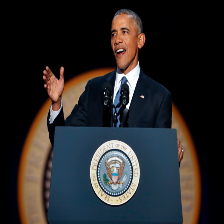

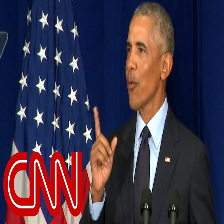

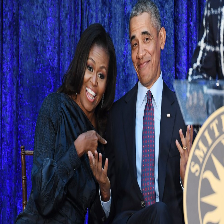

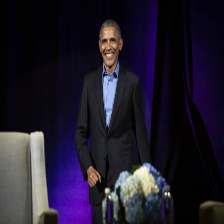

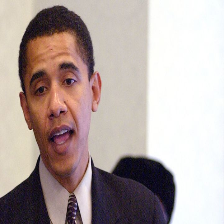

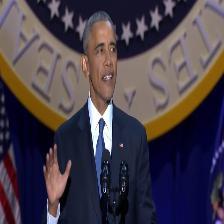

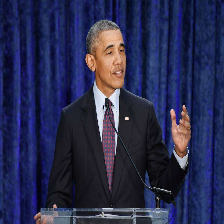

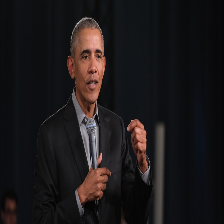

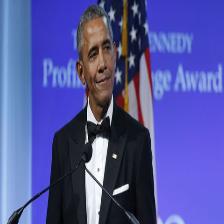

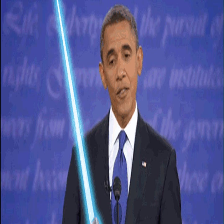

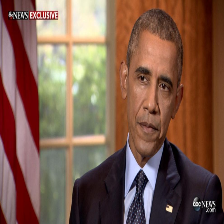

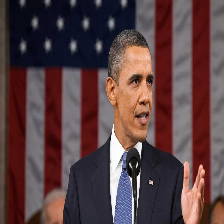

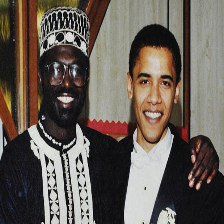

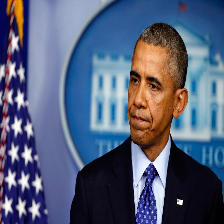

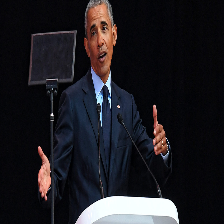

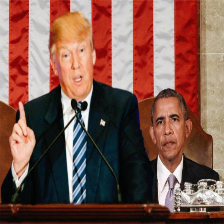

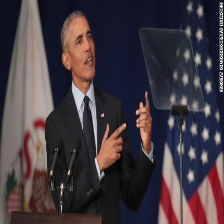

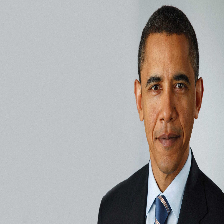

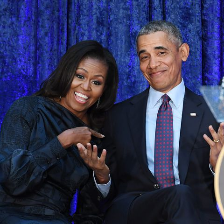

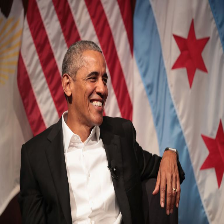

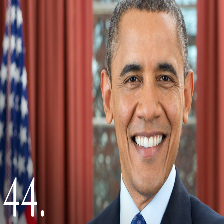

In [ ]:
from scipy import spatial
from google.colab.patches import cv2_imshow
show = full_x[index[0]]
dist = {}
for i in range(count[y_pred2[0]], count[y_pred2[0] + 1]):
	dist1 = spatial.distance.cosine(cbir50_match[i], query_image_match[0])
	dist[i] = dist1

dist = {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}
print(len(dist))
print(dist)

# Show Images
# cv2.imshow('Query Image', show)
cv2_imshow( show)
cv2.waitKey(0)
for i in range(20):
  val = list(dist.keys())[i]
  # cv2.imshow('image', full_x[val])
  # plt.imshow( full_x[val])
  cv2_imshow(full_x[val])
  #write

  cv2.waitKey(0)

In [ ]:
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

full_x = np.load('/content/drive/MyDrive/IR/Features/CBIR50/CBIR50_X_train.npy')
print(full_x.shape)

# Check and save where labels(folders) are starting
labels = np.load('/content/drive/MyDrive/IR/Features/CBIR50/labels.npy')
temp_count = 0
count = {0: 0}
j = 1
for i in range(len(labels) - 1):
	if labels[i + 1] == labels[i]:
		temp_count += 1
	else:
		count[j] = temp_count + 1
		temp_count = temp_count + 1
		j += 1
count[12] = full_x.shape[0] - 1
print(count)

# Load data for predicting and matching
cbir50_predict = np.load('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_lda.npy') # Used for predicting
cbir50_match = np.load('/content/drive/MyDrive/IR/Features/CBIR50/combined_features_train_pca.npy') # Used for matching
print(cbir50_predict.shape)
print(cbir50_match.shape)


print(labels.shape)

X_train, X_test, y_train, y_test = train_test_split(cbir50_predict, labels, test_size=0.2)
print(y_train)


clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf3.fit(X_train, y_train)


y_pred5= clf3.predict(X_test)

class_report = classification_report(y_test, y_pred5, output_dict=True)
print('Precision =', class_report['macro avg']['precision'])
print('Recall = ', class_report['macro avg']['recall'])
print('F1-score =', class_report['macro avg']['f1-score'])
print('Accuracy =', class_report['accuracy'])
acc5 = accuracy_score(y_pred5, y_test)
print(acc5)




# Images match Code
index = [count[1] + 17] # Give query image index here
test_labels = []
query_image = []
query_image_match = []
show = full_x[index[0]]

for i in range(len(index)):
	query_image.append(cbir50_predict[index[i]])
	query_image_match.append(cbir50_match[index[i]])
query_image = np.array(query_image)
query_image_match = np.array(query_image_match)
print(query_image.shape)
print(query_image_match.shape)

for i in range(len(index)):
	cbir50_match = np.delete(cbir50_match, index[i], axis=0)
	cbir50_predict = np.delete(cbir50_predict, index[i], axis=0)
	full_x = np.delete(full_x, index[i], axis=0)
print(cbir50_predict.shape)

for i in range(len(index)):
	test_labels.append(labels[index[i]])

for i in range(len(index)):
	labels = np.delete(labels, index[i], axis=0)
print(labels.shape)



clf4 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf4.fit(cbir50_predict, labels)
# y_pred5= clf3.predict(X_test)


filename3 = '/content/drive/MyDrive/IR/Features/CBIR50/SVM_CBIR_model.sav'
pickle.dump(clf4, open(filename3, 'wb'))

# load the model from disk
loaded_model3 = pickle.load(open(filename3, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# y_pred = model.predict(query_image)
y_pred4 = loaded_model3.predict(query_image)

print(y_pred4)
acc4 = accuracy_score(y_pred4, test_labels)
print(acc4)

(9900, 224, 224, 3)
{0: 0, 1: 198, 2: 396, 3: 594, 4: 792, 5: 990, 6: 1188, 7: 1386, 8: 1584, 9: 1782, 10: 1980, 11: 2178, 12: 9899, 13: 2574, 14: 2772, 15: 2970, 16: 3168, 17: 3366, 18: 3564, 19: 3762, 20: 3960, 21: 4158, 22: 4356, 23: 4554, 24: 4752, 25: 4950, 26: 5148, 27: 5346, 28: 5544, 29: 5742, 30: 5940, 31: 6138, 32: 6336, 33: 6534, 34: 6732, 35: 6930, 36: 7128, 37: 7326, 38: 7524, 39: 7722, 40: 7920, 41: 8118, 42: 8316, 43: 8514, 44: 8712, 45: 8910, 46: 9108, 47: 9306, 48: 9504, 49: 9702}
(9900, 196)
(9900, 2500)
(9900,)
[46 35 20 ... 19 16  1]
Precision = 0.999591836734694
Recall =  0.9995121951219512
F1-score = 0.9995469008527428
Accuracy = 0.9994949494949495
0.9994949494949495
(1, 196)
(1, 2500)
(9899, 196)
(9899,)
[1]
1.0


198
{285: 0.8317176453489005, 272: 0.8331166361363199, 370: 0.839178209825167, 274: 0.8447226324168371, 329: 0.8537644511259451, 302: 0.8548815767894093, 382: 0.8568882444291316, 236: 0.8594415279589126, 352: 0.8596667053886173, 279: 0.862434194127855, 345: 0.8666137572657725, 228: 0.867424280330722, 372: 0.8691968696719292, 346: 0.8704777827918312, 270: 0.8714897639306773, 233: 0.8724986594458175, 255: 0.8737973098016759, 368: 0.8759273476703867, 320: 0.8785892348717627, 330: 0.8808062362716296, 315: 0.8811588149328479, 218: 0.8825386845608707, 212: 0.8827895386066306, 367: 0.8842013585262093, 310: 0.8853262363986629, 324: 0.8854131849498802, 369: 0.8858703438607058, 341: 0.8864007973103669, 267: 0.8875106043261406, 225: 0.8909318776522326, 379: 0.8914048674196108, 295: 0.8917064668152452, 253: 0.8921314670992392, 248: 0.8937079268142825, 276: 0.8945575216463668, 359: 0.8954971931537685, 376: 0.8956869936216275, 216: 0.8957208791885819, 289: 0.8967475484062627, 306: 0.8974159908163599

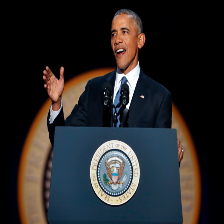

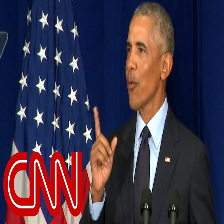

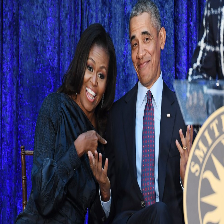

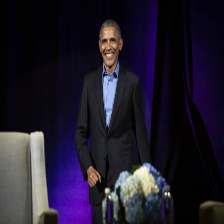

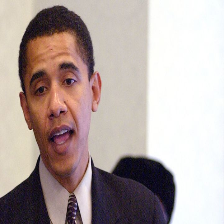

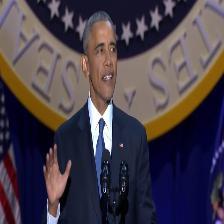

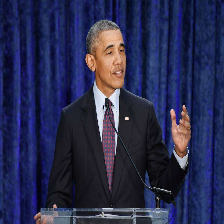

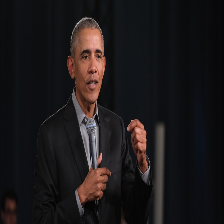

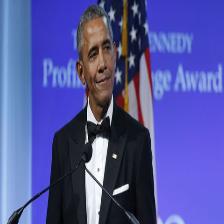

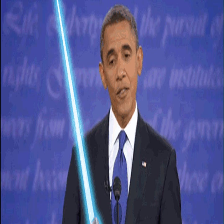

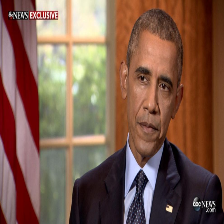

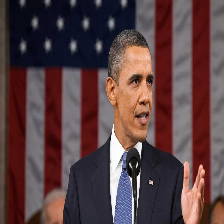

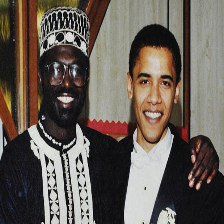

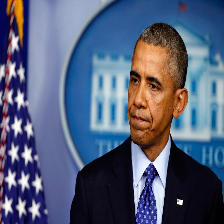

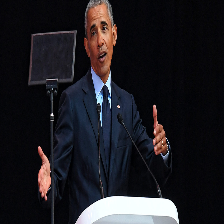

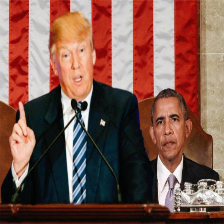

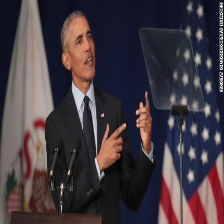

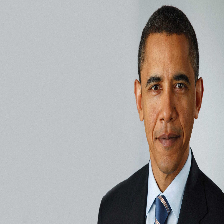

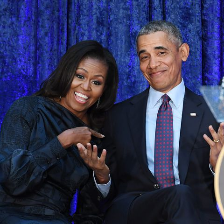

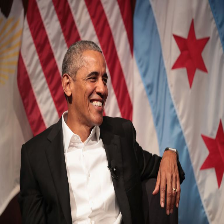

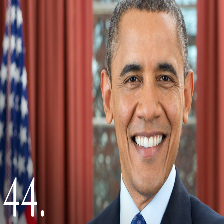

In [ ]:
from scipy import spatial
from google.colab.patches import cv2_imshow
show = full_x[index[0]]
dist = {}
for i in range(count[y_pred4[0]], count[y_pred4[0] + 1]):
	dist1 = spatial.distance.cosine(cbir50_match[i], query_image_match[0])
	dist[i] = dist1

dist = {k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}
print(len(dist))
print(dist)

# Show Images
# cv2.imshow('Query Image', show)
cv2_imshow( show)
cv2.waitKey(0)
for i in range(20):
  val = list(dist.keys())[i]
  # cv2.imshow('image', full_x[val])
  # plt.imshow( full_x[val])
  cv2_imshow(full_x[val])
  #write

  cv2.waitKey(0)